In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import r2_score

In [2]:
# a) Baixe o arquivo data_preg.mat ou data_preg.csv. A primeira coluna representa os valores de x e a segunda coluna representa os valores de y.

data = pd.read_csv("/content/data_preg.csv", header=None)

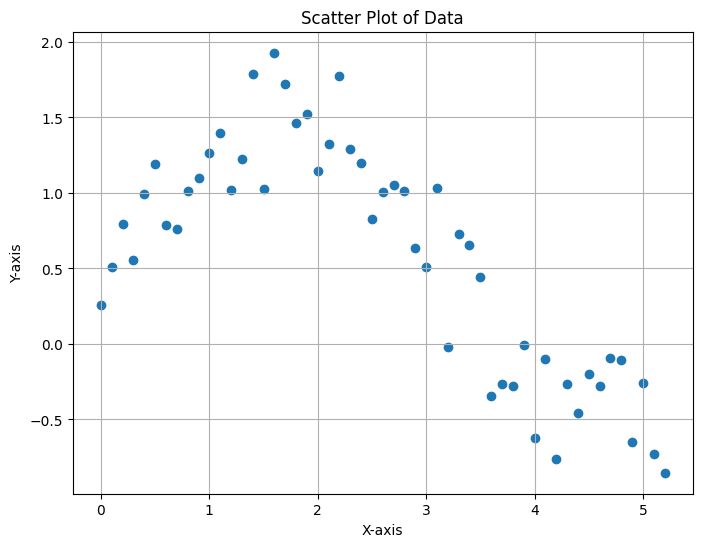

In [3]:
# b) Faça o Gráfico de dispersão dos dados.

plt.figure(figsize=(8, 6))
plt.scatter(data[0], data[1])
plt.xlabel("X-axis")
plt.ylabel("Y-axis")
plt.title("Scatter Plot of Data")
plt.grid(True)
plt.show()

In [4]:
x = data[0].values
y = data[1].values

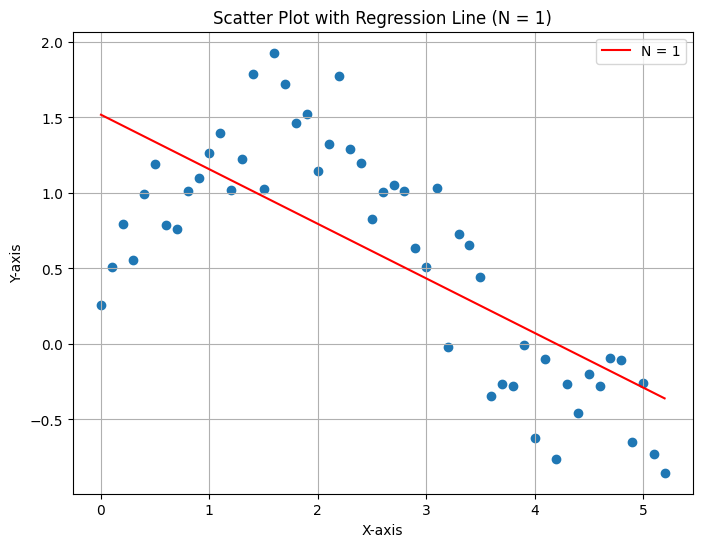

In [5]:
# c) Use a função polyfit para gerar a linha de regressão para N = 1 e trace-o
# no gráfico de dispersão na cor vermelha (plot (x, y, 'r')).
 # (Observe que nesta função a numeração coeficiente é invertida! β0=βN ,
 # β1=βN−1 , β2=βN−2 , ...βN=β0)

 # polyfit dá os valores ao contrário, é preciso inverter

coeficientes = np.polyfit(x, y, 1)

x_line = np.linspace(min(x), max(x), 100)
y_line = np.polyval(coeficientes, x_line)

plt.figure(figsize=(8, 6))
plt.scatter(x, y)
plt.plot(x_line, y_line, color='red', label='N = 1')
plt.xlabel("X-axis")
plt.ylabel("Y-axis")
plt.title("Scatter Plot with Regression Line (N = 1)")
plt.grid(True)
plt.legend()
plt.show()

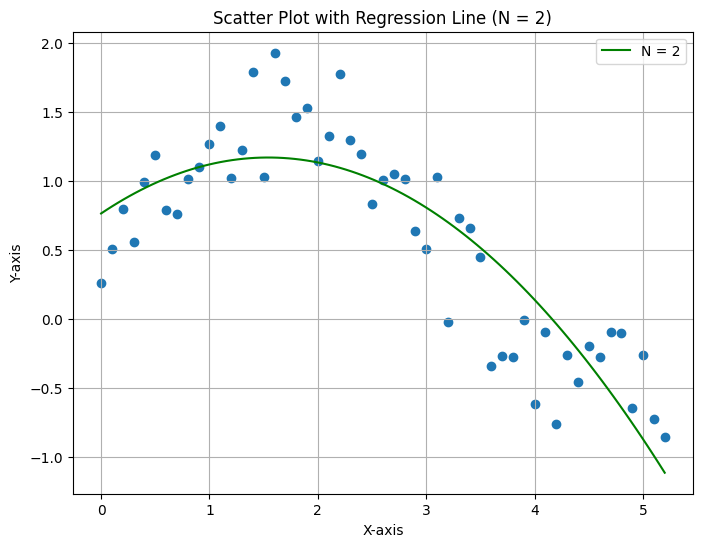

In [6]:
# d) Trace a linha de regressão para N = 2 no gráfico na cor verde. Para isso,
# você deverá calcular esta função y = 𝛽0 + 𝛽1X + 𝛽2X2 + 𝛽3X3 + …+ 𝛽 NXN, isto
# é, não pode usar a função pronta do python.

X = np.vstack([np.ones(len(x)), x, x**2]).T

coeficientes = np.linalg.solve(X.T @ X, X.T @ y)

x_line = np.linspace(min(x), max(x), 100)
y_line = coeficientes[0] + coeficientes[1] * x_line + coeficientes[2] * x_line**2

# Plot the scatter plot and regression lines
plt.figure(figsize=(8, 6))
plt.scatter(x, y)
plt.plot(x_line, y_line, color='green', label='N = 2')
plt.xlabel("X-axis")
plt.ylabel("Y-axis")
plt.title("Scatter Plot with Regression Line (N = 2)")
plt.grid(True)
plt.legend()
plt.show()

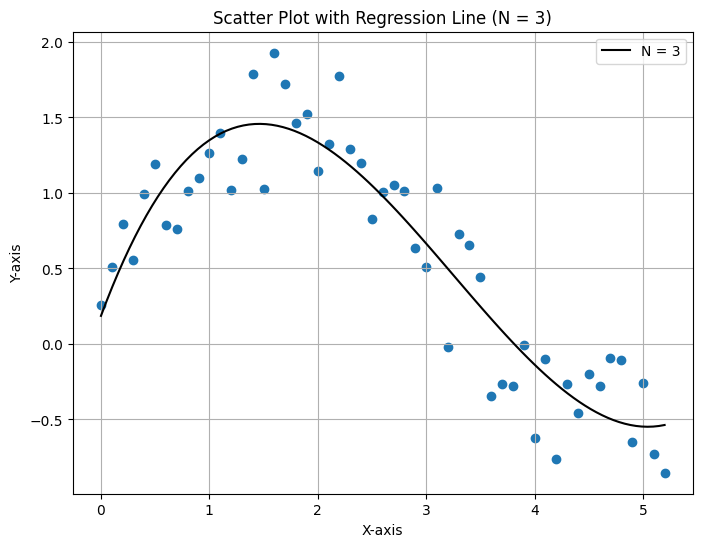

In [7]:
# e) Trace a linha de regressão para N = 3 no gráfico na cor preta.

X = np.vstack([np.ones(len(x)), x, x**2, x**3]).T

coeficientes = np.linalg.solve(X.T @ X, X.T @ y)

x_line = np.linspace(min(x), max(x), 100)
y_line = coeficientes[0] + coeficientes[1] * x_line + coeficientes[2] * x_line**2 + coeficientes[3] * x_line**3

plt.figure(figsize=(8, 6))
plt.scatter(x, y)
plt.plot(x_line, y_line, color='black', label='N = 3')
plt.xlabel("X-axis")
plt.ylabel("Y-axis")
plt.title("Scatter Plot with Regression Line (N = 3)")
plt.grid(True)
plt.legend()
plt.show()

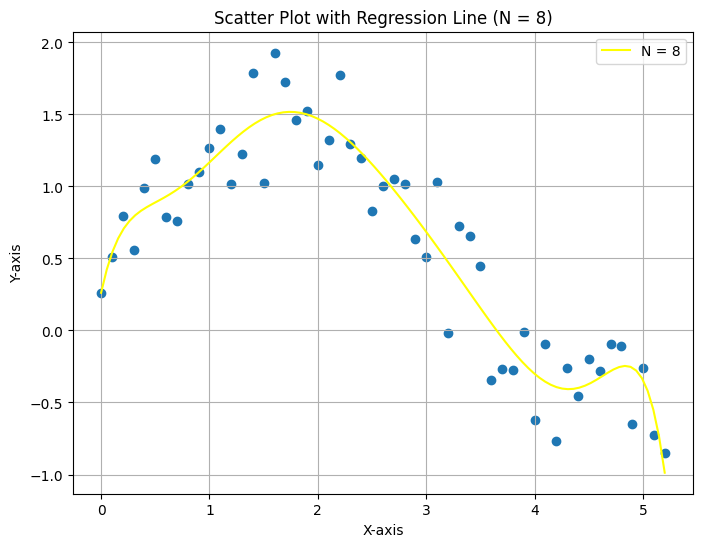

In [8]:
# f) Trace a linha de regressão para N = 8 no gráfico na cor amarela.

X = np.vstack([x**i for i in range(9)]).T

coeficientes = np.linalg.solve(X.T @ X, X.T @ y)

x_line = np.linspace(min(x), max(x), 100)
y_line = sum(coeficientes[i] * x_line**i for i in range(9))

plt.figure(figsize=(8, 6))
plt.scatter(x, y)
plt.plot(x_line, y_line, color='yellow', label='N = 8')
plt.xlabel("X-axis")
plt.ylabel("Y-axis")
plt.title("Scatter Plot with Regression Line (N = 8)")
plt.grid(True)
plt.legend()
plt.show()

In [10]:
# g) Calcule o Erro Quadrático Médio (EQM) para cada linha de regressão.
# Qual é o mais preciso?

def mean_squared_error(y_true, y_pred):
    return np.mean((y_true - y_pred) ** 2)

eqm_values = {}

for N in [1, 2, 3, 8]:
    X = np.vstack([x**i for i in range(N+1)]).T

    coeficientes = np.linalg.solve(X.T @ X, X.T @ y)
    y_pred = sum(coeficientes[i] * x**i for i in range(N+1))
    eqm_values[N] = mean_squared_error(y, y_pred)

for degree, eqm in eqm_values.items():
    print(f"EQM para N = {degree}: {eqm:.4f}")

EQM para N = 1: 0.2659
EQM para N = 2: 0.1385
EQM para N = 3: 0.0787
EQM para N = 8: 0.0587


In [11]:
# h) Para evitar o overfitting, divida os dados aleatoriamente em Dados de
# Treinamento e Dados de Teste. Use 10% dos dados como conjunto de teste, e o
# resto como de treinamento.

np.random.seed(42)
indices = np.random.permutation(len(x))

test_size = int(len(x) * 0.1)

test_indices = indices[:test_size]
train_indices = indices[test_size:]

x_train, y_train = x[train_indices], y[train_indices]
x_test, y_test = x[test_indices], y[test_indices]

def mean_squared_error(y_true, y_pred):
    return np.mean((y_true - y_pred) ** 2)

eqm_train = {}
eqm_test = {}

for N in [1, 2, 3, 8]:
    X_train = np.vstack([x_train**i for i in range(N+1)]).T
    X_test = np.vstack([x_test**i for i in range(N+1)]).T

    coeficientes = np.linalg.solve(X_train.T @ X_train, X_train.T @ y_train)

    y_train_pred = sum(coeficientes[i] * x_train**i for i in range(N+1))
    y_test_pred = sum(coeficientes[i] * x_test**i for i in range(N+1))

    eqm_train[N] = mean_squared_error(y_train, y_train_pred)
    eqm_test[N] = mean_squared_error(y_test, y_test_pred)

print("EQM nos Dados de Treinamento:")
for degree, eqm in eqm_train.items():
    print(f"N = {degree}: {eqm:.4f}")

print("\nEQM nos Dados de Teste:")
for degree, eqm in eqm_test.items():
    print(f"N = {degree}: {eqm:.4f}")

EQM nos Dados de Treinamento:
N = 1: 0.2818
N = 2: 0.1447
N = 3: 0.0786
N = 8: 0.0592

EQM nos Dados de Teste:
N = 1: 0.1156
N = 2: 0.0804
N = 3: 0.0871
N = 8: 0.0711


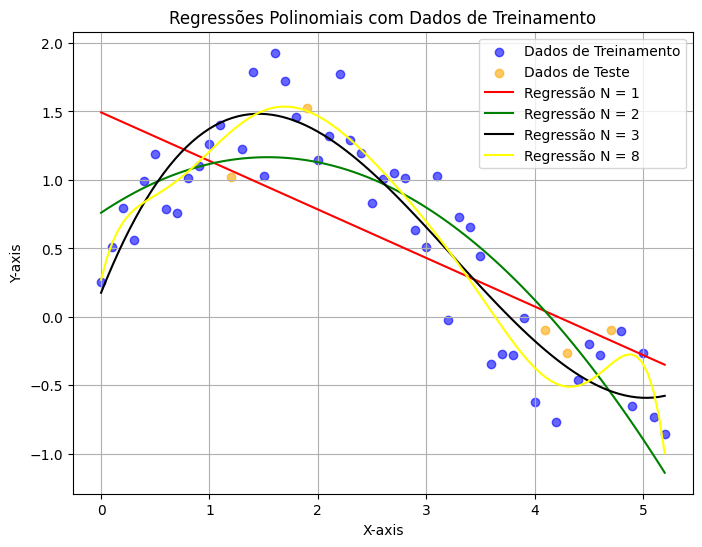

EQM nos Dados de Treinamento:
N = 1: 0.2818
N = 2: 0.1447
N = 3: 0.0786
N = 8: 0.0592

EQM nos Dados de Teste:
N = 1: 0.1156
N = 2: 0.0804
N = 3: 0.0871
N = 8: 0.0711


In [12]:
# i) Repita os passos de c - f, mas agora use apenas os dados de treinamento
# para ajustar a linha de regressão.

np.random.seed(42)
indices = np.random.permutation(len(x))

test_size = int(len(x) * 0.1)

test_indices = indices[:test_size]
train_indices = indices[test_size:]

x_train, y_train = x[train_indices], y[train_indices]
x_test, y_test = x[test_indices], y[test_indices]

def mean_squared_error(y_true, y_pred):
    return np.mean((y_true - y_pred) ** 2)

plt.figure(figsize=(8, 6))
plt.scatter(x_train, y_train, label="Dados de Treinamento", color="blue", alpha=0.6)
plt.scatter(x_test, y_test, label="Dados de Teste", color="orange", alpha=0.6)

eqm_train = {}
eqm_test = {}

colors = {1: 'red', 2: 'green', 3: 'black', 8: 'yellow'}

for N in [1, 2, 3, 8]:
    X_train = np.vstack([x_train**i for i in range(N+1)]).T
    X_test = np.vstack([x_test**i for i in range(N+1)]).T

    coeficientes = np.linalg.solve(X_train.T @ X_train, X_train.T @ y_train)

    x_line = np.linspace(min(x_train), max(x_train), 100)
    y_line = sum(coeficientes[i] * x_line**i for i in range(N+1))

    plt.plot(x_line, y_line, color=colors[N], label=f'Regressão N = {N}')

    y_train_pred = sum(coeficientes[i] * x_train**i for i in range(N+1))
    y_test_pred = sum(coeficientes[i] * x_test**i for i in range(N+1))

    eqm_train[N] = mean_squared_error(y_train, y_train_pred)
    eqm_test[N] = mean_squared_error(y_test, y_test_pred)

plt.xlabel("X-axis")
plt.ylabel("Y-axis")
plt.title("Regressões Polinomiais com Dados de Treinamento")
plt.legend()
plt.grid(True)
plt.show()

print("EQM nos Dados de Treinamento:")
for degree, eqm in eqm_train.items():
    print(f"N = {degree}: {eqm:.4f}")

print("\nEQM nos Dados de Teste:")
for degree, eqm in eqm_test.items():
    print(f"N = {degree}: {eqm:.4f}")

In [13]:
# j) Repita o passo g, mas agora utilize somente os dados de Teste para calcular o erro.

np.random.seed(42)
indices = np.random.permutation(len(x))

test_size = int(len(x) * 0.1)

test_indices = indices[:test_size]
train_indices = indices[test_size:]

x_train, y_train = x[train_indices], y[train_indices]
x_test, y_test = x[test_indices], y[test_indices]

def mean_squared_error(y_true, y_pred):
    return np.mean((y_true - y_pred) ** 2)

eqm_test = {}

for N in [1, 2, 3, 8]:
    X_train = np.vstack([x_train**i for i in range(N+1)]).T
    X_test = np.vstack([x_test**i for i in range(N+1)]).T

    x = data[0].values
y = data[1].values

np.random.seed(42)
indices = np.random.permutation(len(x))

test_size = int(len(x) * 0.1)

test_indices = indices[:test_size]
train_indices = indices[test_size:]

x_train, y_train = x[train_indices], y[train_indices]
x_test, y_test = x[test_indices], y[test_indices]

def mean_squared_error(y_true, y_pred):
    return np.mean((y_true - y_pred) ** 2)

eqm_test = {}

for N in [1, 2, 3, 8]:
    X_train = np.vstack([x_train**i for i in range(N+1)]).T
    X_test = np.vstack([x_test**i for i in range(N+1)]).T

    coeficientes = np.linalg.solve(X_train.T @ X_train, X_train.T @ y_train)
    y_test_pred = sum(coeficientes[i] * x_test**i for i in range(N+1))
    eqm_test[N] = mean_squared_error(y_test, y_test_pred)

print("\nEQM nos Dados de Teste (Somente):")
for degree, eqm in eqm_test.items():
    print(f"N = {degree}: {eqm:.4f}") == np.linalg.solve(X_train.T @ X_train, X_train.T @ y_train)

    y_test_pred = sum(coeficientes[i] * x_test**i for i in range(N+1))

    eqm_test[N] = mean_squared_error(y_test, y_test_pred)

print("\nEQM nos Dados de Teste (Somente):")
for degree, eqm in eqm_test.items():
    print(f"N = {degree}: {eqm:.4f}")


EQM nos Dados de Teste (Somente):
N = 1: 0.1156
N = 2: 0.0804
N = 3: 0.0871
N = 8: 0.0711

EQM nos Dados de Teste (Somente):
N = 1: 0.1156
N = 2: 0.0804
N = 3: 0.0871
N = 8: 0.0711


In [14]:
# k) Veja o que calcula o Coeficiente de Determinação ou R quadrado. Calcule o
# R2 para os dados de treino e teste (veja a função r2_score da biblioteca ]
# sklearn.metrics). O que se pode concluir com os resultados?

np.random.seed(42)
indices = np.random.permutation(len(x))

test_size = int(len(x) * 0.1)

test_indices = indices[:test_size]
train_indices = indices[test_size:]

x_train, y_train = x[train_indices], y[train_indices]
x_test, y_test = x[test_indices], y[test_indices]

r2_train = {}
r2_test = {}

for N in [1, 2, 3, 8]:
    X_train = np.vstack([x_train**i for i in range(N+1)]).T
    X_test = np.vstack([x_test**i for i in range(N+1)]).T

    coefficients = np.linalg.solve(X_train.T @ X_train, X_train.T @ y_train)

    y_train_pred = sum(coefficients[i] * x_train**i for i in range(N+1))
    y_test_pred = sum(coefficients[i] * x_test**i for i in range(N+1))

    r2_train[N] = r2_score(y_train, y_train_pred)
    r2_test[N] = r2_score(y_test, y_test_pred)

print("\nCoeficiente de Determinação (R²) nos Dados de Treinamento:")
for degree, r2 in r2_train.items():
    print(f"N = {degree}: {r2:.4f}")

print("\nCoeficiente de Determinação (R²) nos Dados de Teste:")
for degree, r2 in r2_test.items():
    print(f"N = {degree}: {r2:.4f}")


Coeficiente de Determinação (R²) nos Dados de Treinamento:
N = 1: 0.5092
N = 2: 0.7479
N = 3: 0.8630
N = 8: 0.8969

Coeficiente de Determinação (R²) nos Dados de Teste:
N = 1: 0.7757
N = 2: 0.8441
N = 3: 0.8311
N = 8: 0.8621


In [ ]:
# l) Visto o cálculo do erro e do coeficiente de determinação, qual o
# modelo mais preciso neste caso? Explique sua resposta.

# Dica: o que possuir o menor EQM.